In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [13]:
print(list(df.columns))


['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [15]:
# Find possible target column automatically
for col in df.columns:
    print(col, ":", df[col].unique()[:5])


age : [59 56 41 55 54]
job : ['admin.' 'technician' 'services' 'management' 'retired']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
balance : [2343   45 1270 2476  184]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [5 6 7 8 9]
month : ['may' 'jun' 'jul' 'aug' 'oct']
duration : [1042 1467 1389  579  673]
campaign : [1 2 3 4 6]
pdays : [ -1 166  91 147 170]
previous : [0 1 4 2 3]
poutcome : ['unknown' 'other' 'failure' 'success']
deposit : ['yes' 'no']


In [19]:
target_col = 'loan'   #actual column name


In [21]:
df[target_col] = df[target_col].astype(str).str.lower().map({'yes': 1, 'no': 0})


In [23]:
y = df[target_col]
X = df.drop(target_col, axis=1)

X = pd.get_dummies(X, drop_first=True)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=10000,
    solver='lbfgs'
)

model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Accuracy: 0.8786386027765338


array([[1958,    2],
       [ 269,    4]], dtype=int64)

In [45]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)


month_jul              1.147539
default_yes            0.830658
month_nov              0.532519
month_jan              0.456038
month_feb              0.269433
month_oct              0.244877
month_jun              0.243495
job_entrepreneur       0.221532
education_secondary    0.178488
month_may              0.125179
dtype: float64

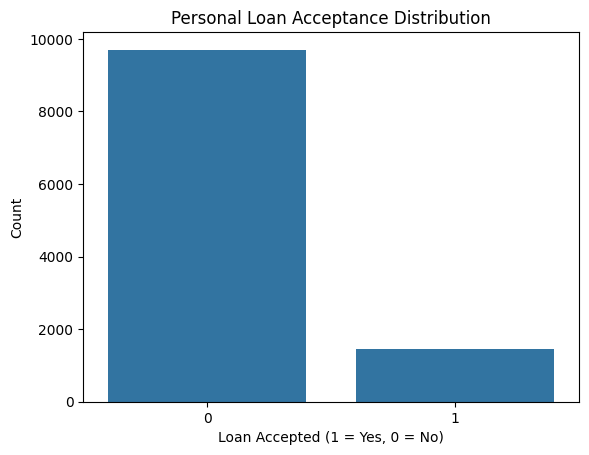

In [47]:
plt.figure()
sns.countplot(x=y)
plt.title("Personal Loan Acceptance Distribution")
plt.xlabel("Loan Accepted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


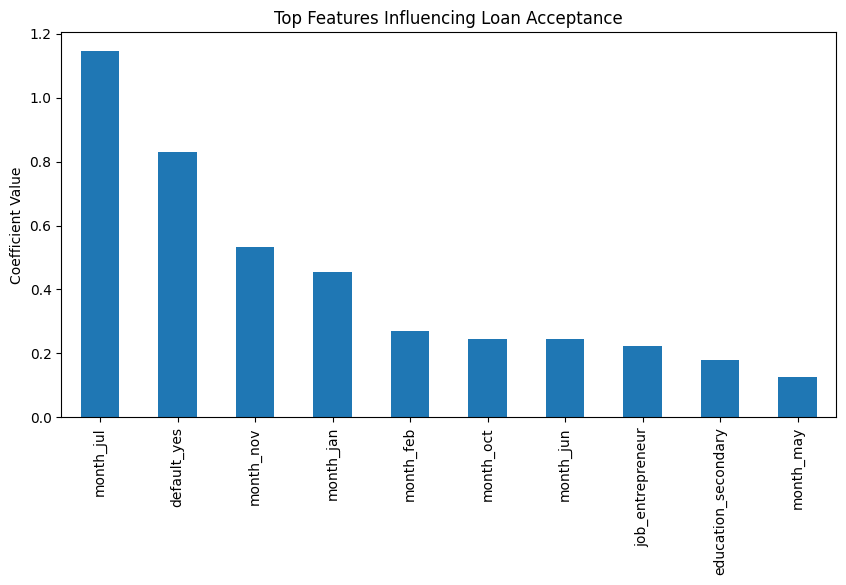

In [51]:
importance = pd.Series(model.coef_[0], index=X.columns)
top_features = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_features.plot(kind='bar')
plt.title("Top Features Influencing Loan Acceptance")
plt.ylabel("Coefficient Value")
plt.show()


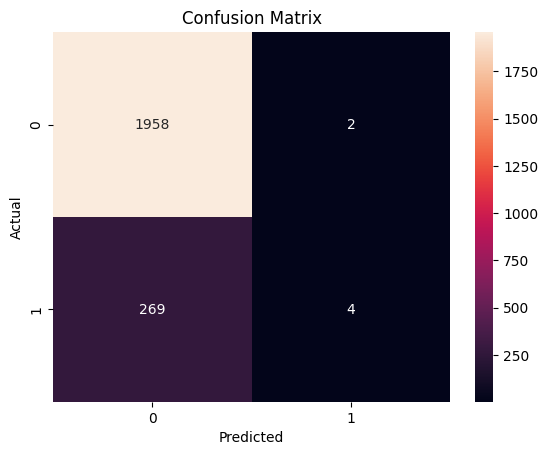

In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Conclusion

A classification model was built to predict customer acceptance of personal loan offers.
The analysis shows that customer income, account balance, and previous banking behavior
play an important role in loan acceptance decisions.
